In [1]:
name = "Arthur Font Gouveia"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)


Name:  Arthur Font Gouveia

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



# MAC0460 / MAC5832 (2021)
<hr>

# EP2: Linear regression - analytic solution

### Objectives:

- to implement and test the analytic solution for the linear regression task (see, for instance, <a href="http://work.caltech.edu/slides/slides03.pdf">Slides of Lecture 03</a> and Lecture 03 of *Learning from Data*)
- to understand the core idea (*optimization of a loss or cost function*) for parameter adjustment in machine learning
<hr>

# Linear regression

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we would like to approximate the unknown function $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (recall that $y^{(i)} =f(\mathbf{x}^{(i)})$) by means of a linear model $h$:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}^{(i)} + b
$$

Note that $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$ and $b$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the observations $\mathbf{x}$ (an artificial coordinate), we have:

$$\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$$

and then we can simplify the notation:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = \hat{y}^{(i)} = \mathbf{w}^\top  \tilde{\mathbf{x}}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* as such metric we have the following cost function:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, the task of determining a function $h$ that is closest to $f$ is reduced to the task of finding the values $\mathbf{w}$ that minimize $J(\mathbf{w})$.

**Now we will explore this model, starting with a simple dataset.**


### Auxiliary functions

In [2]:
# some imports
import numpy as np
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# An auxiliary function
def get_housing_prices_data(N, verbose=True):
    """
    Generates artificial linear data,
    where x = square meter, y = house price

    :param N: data set size
    :type N: int
    
    :param verbose: param to control print
    :type verbose: bool
    :return: design matrix, regression targets
    :rtype: np.array, np.array
    """
    cond = False
    while not cond:
        x = np.linspace(90, 1200, N)
        gamma = np.random.normal(30, 10, x.size)
        y = 50 * x + gamma * 400
        x = x.astype("float32")
        x = x.reshape((x.shape[0], 1))
        y = y.astype("float32")
        y = y.reshape((y.shape[0], 1))
        cond = min(y) > 0
        
    xmean, xsdt, xmax, xmin = np.mean(x), np.std(x), np.max(x), np.min(x)
    ymean, ysdt, ymax, ymin = np.mean(y), np.std(y), np.max(y), np.min(y)
    if verbose:
        print("\nX shape = {}".format(x.shape))
        print("y shape = {}\n".format(y.shape))
        print("X: mean {}, sdt {:.2f}, max {:.2f}, min {:.2f}".format(xmean,
                                                               xsdt,
                                                               xmax,
                                                               xmin))
        print("y: mean {:.2f}, sdt {:.2f}, max {:.2f}, min {:.2f}".format(ymean,
                                                                 ysdt,
                                                                 ymax,
                                                                 ymin))
    return x, y

In [4]:
# Another auxiliary function
def plot_points_regression(x,
                           y,
                           title,
                           xlabel,
                           ylabel,
                           prediction=None,
                           legend=False,
                           r_squared=None,
                           position=(90, 100)):
    """
    Plots the data points and the prediction,
    if there is one.

    :param x: design matrix
    :type x: np.array
    :param y: regression targets
    :type y: np.array
    :param title: plot's title
    :type title: str
    :param xlabel: x axis label
    :type xlabel: str
    :param ylabel: y axis label
    :type ylabel: str
    :param prediction: model's prediction
    :type prediction: np.array
    :param legend: param to control print legends
    :type legend: bool
    :param r_squared: r^2 value
    :type r_squared: float
    :param position: text position
    :type position: tuple
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    line1, = ax.plot(x, y, 'bo', label='Real data')
    if prediction is not None:
        line2, = ax.plot(x, prediction, 'r', label='Predicted data')
        if legend:
            plt.legend(handles=[line1, line2], loc=2)
        ax.set_title(title,
                 fontsize=20,
                 fontweight='bold')
    if r_squared is not None:
        bbox_props = dict(boxstyle="square,pad=0.3",
                          fc="white", ec="black", lw=0.2)
        t = ax.text(position[0], position[1], "$R^2 ={:.4f}$".format(r_squared),
                    size=15, bbox=bbox_props)

    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    plt.show()


### The dataset 

The first dataset we will use is a toy dataset. We will generate $N=100$ observations with only one *feature* and a real value associated to each of them. We can view these observations as being pairs *(area of a real state in square meters, price of the real state)*. Our task is to construct a model that is able to predict the price of a real state, given its area.

In [5]:
X, y = get_housing_prices_data(N=100)


X shape = (100, 1)
y shape = (100, 1)

X: mean 645.0, sdt 323.65, max 1200.00, min 90.00
y: mean 44245.02, sdt 16263.37, max 75233.86, min 12826.14


### Ploting the data

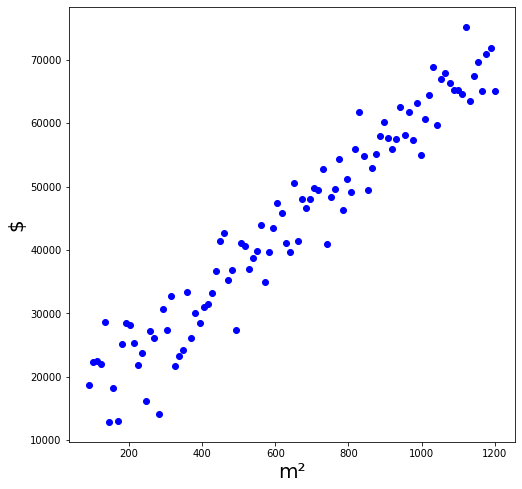

In [6]:
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')

### The solution

Given $f:\mathbb{R}^{N\times M} \rightarrow \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{N\times M}$, we define the gradient of $f$ with respect to $\mathbf{A}$ as:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,m}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,m}}
\end{bmatrix}
\end{equation*}

Let $\mathbf{X} \in \mathbb{R}^{N\times d}$ be a matrix (sometimes also called the *design matrix*) whose rows are the observations of the dataset and let $\mathbf{y} \in \mathbb{R}^{N}$ be the vector consisting of all values $y^{(i)}$ (i.e., $\mathbf{X}^{(i,:)} = \mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)} = y^{(i)}$). It can be verified that: 

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}

Using basic matrix derivative concepts we can compute the gradient of $J(\mathbf{w})$ with respect to $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Thus, when $\nabla_{\mathbf{w}}J(\mathbf{w}) = 0$ we have 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Hence,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

Note that this solution has a high computational cost. As the number of variables (*features*) increases, the cost for matrix inversion becomes prohibitive. See  [this text](https://sgfin.github.io/files/notes/CS229_Lecture_Notes.pdf) for more details.

# <mark>Exercise 1</mark>
Using only **NumPy** (a quick introduction to this library can be found  [here](http://cs231n.github.io/python-numpy-tutorial/)), complete the two functions below. Recall that $\mathbf{X} \in \mathbb{R}^{N\times d}$; thus you will need to add a component of value 1 to each of  the observations in $\mathbf{X}$ before performing the computation described above.

NOTE: Although the dataset above has data of dimension $d=1$, your code must be generic (it should work for $d\geq1$)

## <mark>1.1. Weight computation function</mark>

In [7]:
def normal_equation_weights(X, y):
    """
    Calculates the weights of a linear function using the normal equation method.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(d+1, 1))
    """
    
    # START OF YOUR CODE:
    X = np.hstack(( np.ones((X.shape[0],1)), X ) )
    w = np.linalg.inv(np.matmul(X.T, X)) # X.T = X.transpose()
    w = np.matmul(w, X.T)
    w = np.matmul(w, y)
    
    return w
    # END OF YOUR CODE
    

In [8]:
# test of function normal_equation_weights()

w = 0  # this is not necessary
w = normal_equation_weights(X, y)
print("Estimated w =\n", w)

Estimated w =
 [[12919.96332537]
 [   48.56597767]]


## <mark>1.2. Prediction function</mark>

In [9]:
def normal_equation_prediction(X, w):
    """
    Calculates the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :type w: np.ndarray(shape=(d+1, 1))
    :param y: regression prediction
    :type y: np.ndarray(shape=(N, 1))
    """
    
    # START OF YOUR CODE:
    X = np.hstack(( np.ones((X.shape[0],1)), X ) )
    y = np.matmul(X, w)
    return y
    # END OF YOUR CODE


## <mark>1.3. Coefficient of determination</mark>
We can use the [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) metric (Coefficient of determination) to evaluate how well the linear model fits the data.

**Which $𝑅^2$ value would you expect to observe ?**

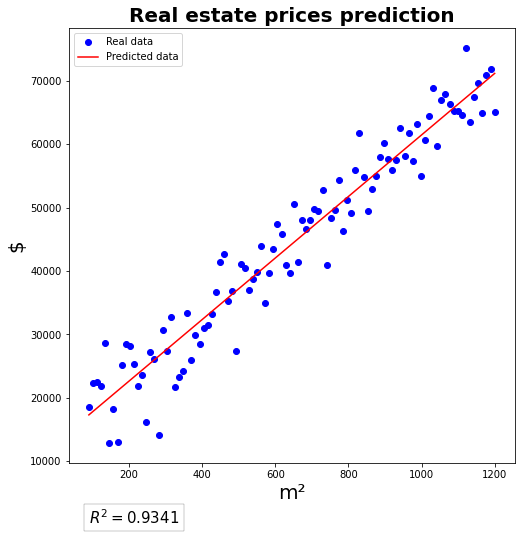

In [10]:
from sklearn.metrics import r2_score

# test of function normal_equation_prediction()
prediction = normal_equation_prediction(X, w)

# compute the R2 score using the r2_score function from sklearn
# Replace 0 with an appropriate call of the function

# START OF YOUR CODE:
r_2 = r2_score(y, prediction)
# END OF YOUR CODE

plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)

## Additional tests

Let us compute a prediction for $x=650$


In [11]:
# Let us use the prediction function
x = np.asarray([650]).reshape(1,1)
prediction = normal_equation_prediction(x, w)
print("Area = %.2f  Predicted price = %.4f" %(x[0], prediction))

Area = 650.00  Predicted price = 44487.8488


## <mark>1.4. Processing time</mark>

Experiment with different nummber of samples $N$ and observe how processing time varies.

Be careful not to use a too large value; it may make jupyter freeze ...

In [12]:
# Add other values for N
# START OF YOUR CODE:
N = [100000] 
# END OF YOUR CODE

for i in N:
    X, y = get_housing_prices_data(N=i)
    init = time.time()
    w = normal_equation_weights(X, y)
    prediction = normal_equation_prediction(X,w)
    init = time.time() - init
    
    print("\nExecution time = {:.8f}(s)\n".format(init))


X shape = (100000, 1)
y shape = (100000, 1)

X: mean 645.0000610351562, sdt 320.43, max 1200.00, min 90.00
y: mean 44244.45, sdt 16537.22, max 83645.11, min 3100.87

Execution time = 0.02521491(s)



# <mark>Exercise 2</mark>

Let us test the code with $𝑑>1$. 
We will use the data we have collected in our first class. The [file](https://edisciplinas.usp.br/pluginfile.php/5982803/course/section/6115454/QT1data.csv) can be found on e-disciplinas. 

Let us try to predict the weight based on one or more features.

In [13]:
import pandas as pd

# load the dataset
df = pd.read_csv('QT1data.csv')
df.head()

,Sex,Age,Height,Weight,Shoe number,Trouser number
0,Female,53,154,59,36,40
1,Male,23,170,56,40,38
2,Female,23,167,63,37,40
3,Male,21,178,78,40,40
4,Female,25,153,58,36,38


In [14]:
df.describe()

,Age,Height,Weight,Shoe number
count,130.000000,130.000000,130.000000,130.000000
mean,28.238462,170.684615,70.238462,39.507692
std,12.387042,11.568491,15.534809,2.973386
min,3.000000,100.000000,15.000000,24.000000
25%,21.000000,164.250000,60.000000,38.000000
50%,23.000000,172.000000,69.500000,40.000000
75%,29.000000,178.000000,80.000000,41.000000
max,62.000000,194.000000,130.000000,46.000000


In [17]:
# Our target variable is the weight
y = df.pop('Weight').values
y

array([ 59,  56,  63,  78,  58,  89,  68,  83,  70,  56,  65,  66,  78,
        75,  47,  68,  65,  99,  80,  62,  60,  84,  91,  60,  15,  85,
        56,  62,  69,  78,  60,  48,  66,  85, 101,  74,  52,  52,  80,
        72,  75,  78,  61,  74,  70,  90,  66,  79,  80,  65,  90,  69,
        58,  63,  62,  73,  55,  65,  62,  75,  48,  59,  74,  80,  51,
        90,  58, 117,  77,  75,  56,  50,  67,  93,  70,  76,  85,  50,
        86,  96,  63,  56,  90,  95, 130,  70,  83,  70,  64,  57,  54,
        69,  53,  28,  62,  68,  73,  54,  75,  85,  62,  69,  55,  82,
        84,  52,  64,  73,  86,  77,  64,  65,  55,  50,  98,  77,  51,
        66,  83,  61,  80,  81,  76,  78,  70,  75,  72,  80,  90,  53])

## <mark>2.1. One feature ($d=1$)</mark>

We will use 'Height' as the input feature and predict the weight

In [ ]:
feature_cols = ['Height']
X = df.loc[:, feature_cols]
X.shape

Write the code for computing the following
- compute the regression weights using $\mathbf{X}$ and $\mathbf{y}$
- compute the prediction
- compute the $R^2$ value
- plot the regression graph (use appropriate values for the parameters of function <tt>plot_points_regression()</tt>)

In [ ]:
# START OF YOUR CODE:
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X, w)
r_2 = r2_score(y, prediction)

print("MSE - Mean Squared Error:", r_2)
plot_points_regression(X,
                       y,
                       title='Weight prediction by height',
                       xlabel="Height(cm)",
                       ylabel='Weight(kg)',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)
# END OF YOUR CODE

## <mark>2.2 - Two input features ($d=2$)</mark>

Now repeat the exercise with using as input the features 'Height' and 'Shoe number'

- compute the regression weights using $\mathbf{X}$ and $\mathbf{y}$
- compute the prediction
- compute and print the $R^2$ value

Note that our plotting function can not be used. There is no need to do plotting here.

In [ ]:
# START OF YOUR CODE:
feature_cols = ['Height', 'Shoe number']
X = df.loc[:, feature_cols]
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X, w)
r_2 = r2_score(y, prediction)

print("MSE - Mean Squared Error:", r_2)
# END OF YOUR CODE

## 2.3 - <mark>Three input features ($d=3$)</mark>

Now try with three features. There is no need to do plotting here.
- compute the regression weights using $\mathbf{X}$ and $\mathbf{y}$
- compute the prediction
- compute and print the $R^2$ value

In [ ]:
# START OF YOUR CODE:
feature_cols = ['Height', 'Shoe number', 'Age']
X = df.loc[:, feature_cols]
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X, w)
r_2 = r2_score(y, prediction)

print("MSE - Mean Squared Error:", r_2)
# END OF YOUR CODE

## <mark>2.4 - Your comments</mark>

Did you observe anything interesting with varying values of $d$ ? Comment about it.

YOUR COMMENT BELOW:

===> Conforme adicionamos parâmetros à esta regressão linear, o erro quadrático médio aumentou. Portanto, o algoritmo perfomou melhor com apenas um parâmetro.

